<a href="https://colab.research.google.com/github/Tarun280896/AI/blob/master/Human_and_horse_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data contains images of hourses and humans.
- 2 class classification (Binary) 

In [3]:
# data source
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-05-08 13:33:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.250.101.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   168MB/s    in 0.8s    

2021-05-08 13:33:51 (168 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



- Loading data

In [4]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [5]:
# Directory with training horse pictures
X_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with training human pictures
X_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [6]:
X_horse_names = os.listdir(X_horse_dir)
print(f"file with hourse: \n{X_horse_names[:5]}\n")

X_human_names = os.listdir(X_human_dir)
print(f"file with humans: \n{X_human_names[:5]}")

file with hourse: 
['horse18-4.png', 'horse19-6.png', 'horse41-9.png', 'horse07-7.png', 'horse09-3.png']

file with humans: 
['human16-17.png', 'human17-10.png', 'human16-16.png', 'human05-28.png', 'human15-12.png']


In [7]:
print('total training horse images:', len(os.listdir(X_horse_dir)))
print('total training human images:', len(os.listdir(X_human_dir)))

total training horse images: 500
total training human images: 527


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

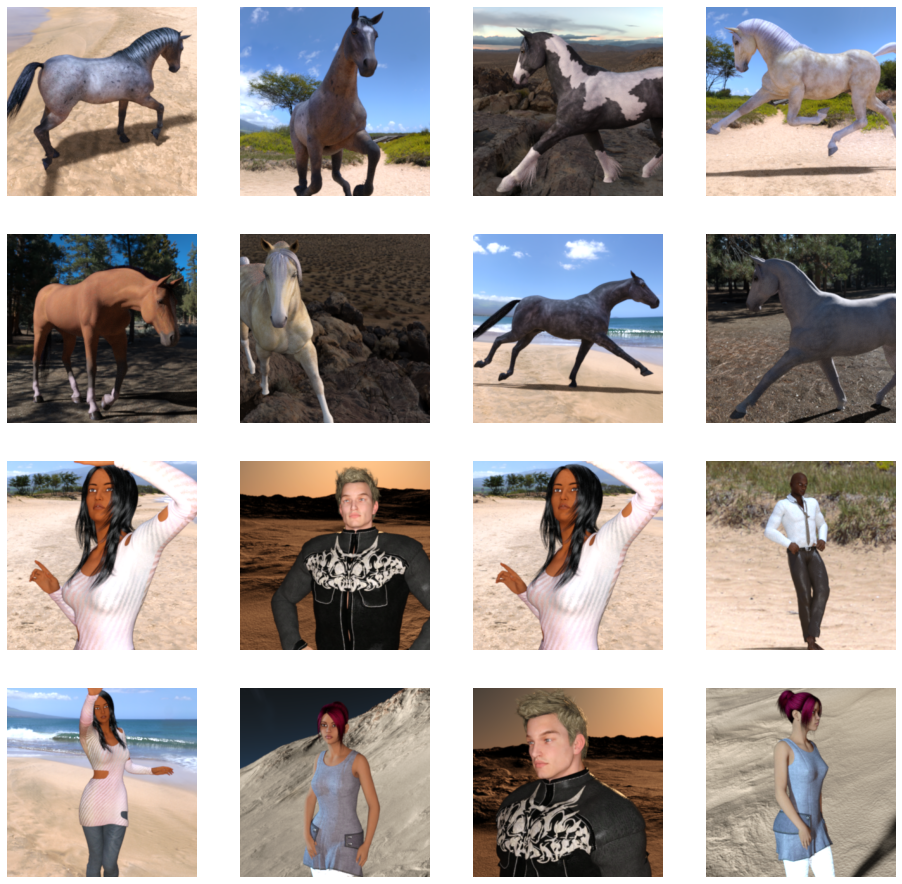

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(X_horse_dir, fname) 
                for fname in X_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(X_human_dir, fname) 
                for fname in X_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


##Building CNN

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [21]:
def get_model():
  #simple model 
  model = Sequential()
  #layer 1
  model.add(Conv2D(16, (3,3),activation = 'relu', input_shape = (300,300,3)))
  model.add(MaxPooling2D(2,2))
  #layer 2
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  #dense layers
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(1,activation= 'sigmoid'))
  return model

Using adam optimizer

In [22]:
model = get_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 170528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               21827712  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

Using generator to load images

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
#Creating ImageGenerator 
#rescaling each image while loading
train_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Flow through directory
train_generator = train_datagen.flow_from_directory(
    directory='/tmp/horse-or-human',#directory path
    target_size = (300,300),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 128
                           )

Found 1027 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator, epochs = 10, steps_per_epoch= 8)

Epoch 1/10
8/8 [==============================] - 60s 7s/step - loss: 5.7882 - accuracy: 0.4641
Epoch 2/10
8/8 [==============================] - 64s 8s/step - loss: 0.8229 - accuracy: 0.5228
Epoch 3/10
8/8 [==============================] - 57s 7s/step - loss: 0.5503 - accuracy: 0.7582
Epoch 4/10
8/8 [==============================] - 57s 7s/step - loss: 0.3552 - accuracy: 0.8395
Epoch 5/10
8/8 [==============================] - 57s 7s/step - loss: 0.1708 - accuracy: 0.9392
Epoch 6/10
8/8 [==============================] - 64s 8s/step - loss: 0.1308 - accuracy: 0.9548
Epoch 7/10
8/8 [==============================] - 57s 7s/step - loss: 0.0489 - accuracy: 0.9919
Epoch 8/10
8/8 [==============================] - 57s 7s/step - loss: 0.0277 - accuracy: 0.9971
Epoch 9/10
8/8 [==============================] - 65s 8s/step - loss: 0.0122 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 58s 7s/step - loss: 0.0049 - accuracy: 1.0000


##Creating test data

In [33]:

os.mkdir('/tmp/test')

In [34]:
!wget --no-check-certificate \
https://cdn.pixabay.com/photo/2019/12/07/18/28/horse-4679863_960_720.jpg \
-O /tmp/test/test_hourse.img

--2021-05-08 14:19:52--  https://cdn.pixabay.com/photo/2019/12/07/18/28/horse-4679863_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108397 (106K) [image/jpeg]
Saving to: ‘/tmp/test/test_hourse.img’

/tmp/test/test_hour 100%[===================>] 105.86K  --.-KB/s    in 0.02s   

2021-05-08 14:19:52 (6.55 MB/s) - ‘/tmp/test/test_hourse.img’ saved [108397/108397]



In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
fn = 'test_hourse.img'
path = '/tmp/test/'+ fn
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
  print(fn + " image is a human")
else:
  print(fn + " image is a horse")

[0.]
test_hourse.img image is a horse


## Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


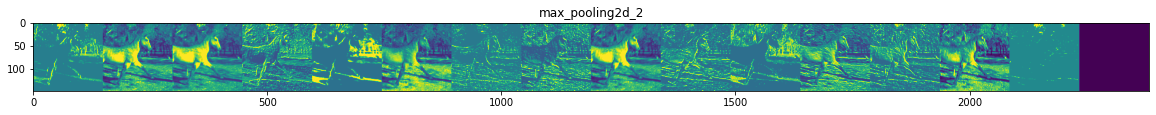

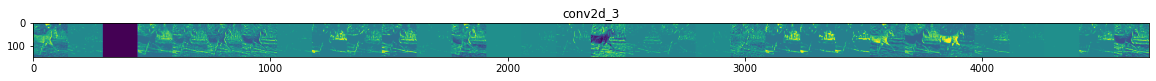

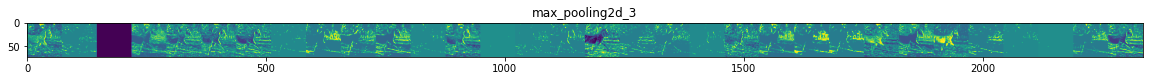

In [39]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(X_horse_dir, f) for f in X_horse_names]
human_img_files = [os.path.join(X_human_dir, f) for f in X_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')